# Normalization Exercise

## Data Loading

In [188]:
import pandas as pd

# load data
df = pd.read_csv('dataset.csv')

df.head()

,Product ID,Category,Sub-Category,Product Name
0,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
2,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...
3,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table
4,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System


## Data Cleaning

### Rename Column

In [189]:
# rename Product ID to Id
df.rename(columns={'Product ID':'Id'}, inplace=True)

# rename Product Name to Name
df.rename(columns={'Product Name':'Name'}, inplace=True)

Insight:
- Disini saya mengubah nama kolom Product ID menjadi Id dan kolom Product Name menjadi Name agar lebih simple.

## Normalization

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            1894 non-null   object
 1   Category      1894 non-null   object
 2   Sub-Category  1894 non-null   object
 3   Name          1894 non-null   object
dtypes: object(4)
memory usage: 59.3+ KB


In [191]:
df.head()

,Id,Category,Sub-Category,Name
0,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
2,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...
3,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table
4,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System


Insight:
- Jumlah entries di semua kolom sama, ini menandakan tidak adanya missing values di dalam DataFrame yang digunakan.
- Terdapat duplicate value dari beberapa kolom, seperti yang ada di kolom `Category`, dan `Sub-Category`. Hal ini bisa dibuktikan dengan menggunakan method `.duplicated().any()` pada DataFrame.

In [192]:
# Check if Ship Mode is duplicated
df['Category'].duplicated().any()

True

In [193]:
# Check if Product Name is duplicated
df['Sub-Category'].duplicated().any()

True

Karena adanya duplicate value tersebut, maka bisa kita lakukan normalisasi terhadap DataFrame ini, agar tidak terjadi redudansi data. Dalam proses ini kita akan melakukan hingga bentuk 3NF yang mana nantinya akan memisahkan DataFrame ini menjadi 3 table, Product (main table), Category, dan Sub-Category.

### ERD

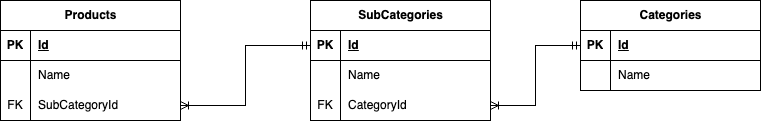

### Table Category

In [194]:
# unique values ship mode
print('Categories:', df['Category'].unique(), sep='\n')

Categories:
['Furniture' 'Office Supplies' 'Technology']


In [195]:
# membuat df baru
categories = pd.DataFrame()

# membuat kolom id untuk table Category
categories['Id'] = [idx+1 for idx, value in enumerate(df['Category'].unique())]

# membuat kolom Category
categories['Category'] = df['Category'].unique()

categories

,Id,Category
0,1,Furniture
1,2,Office Supplies
2,3,Technology


### Table Sub-Category

In [196]:
# unique values customer name
print('sub_categories:', df['Sub-Category'].unique(), sep='\n')

sub_categories:
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [197]:
# membuat df baru
subCategories = df[['Category', 'Sub-Category']].copy()

# membuat kolom CategoryId
categoryIds = []
for i in subCategories['Category']:
    filter = categories[categories['Category'] == i]['Id']
    categoryIds.append(filter.iloc[0])

subCategories['Category'] = categoryIds
subCategories.drop_duplicates(inplace=True, ignore_index=True)
subCategories.rename(columns={"Category":"CategoryId", "Sub-Category":"SubCategory"}, inplace=True)

# membuat kolom Id
subCategories['Id'] = subCategories.index + 1

# re-arrange column
subCategories = subCategories.iloc[:, [2,1,0]]

In [198]:
subCategories

,Id,SubCategory,CategoryId
0,1,Bookcases,1
1,2,Chairs,1
2,3,Labels,2
3,4,Tables,1
4,5,Storage,2
5,6,Furnishings,1
6,7,Art,2
7,8,Phones,3
8,9,Binders,2
9,10,Appliances,2


### Table Product

In [199]:
# membuat kolom SubCategoryId
subCategoryIds = []
for i in df['Sub-Category']:
    filter = subCategories[subCategories['SubCategory'] == i]['Id']
    subCategoryIds.append(filter.iloc[0])

df['Sub-Category'] = subCategoryIds

# drop column Category
df.drop(columns="Category", inplace=True)

# rename column Sub-Category to SubCategoryId
df.rename(columns={"Sub-Category":"SubCategoryId"})

df.head()

,Id,Sub-Category,Name
0,FUR-BO-10001798,1,Bush Somerset Collection Bookcase
1,FUR-CH-10000454,2,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
2,OFF-LA-10000240,3,Self-Adhesive Address Labels for Typewriters b...
3,FUR-TA-10000577,4,Bretford CR4500 Series Slim Rectangular Table
4,OFF-ST-10000760,5,Eldon Fold 'N Roll Cart System


Insight:
- sekarang kita sudah berhasil melakukan normalisasi terhadap table `Products`, `Categories` dan `SubCategories`.
- selanjutnya adalah kita membuat script SQL agar dapat kita migrasi-kan ke dalam PostgreSQL

### Export hasil normalisasi

In [200]:
df.to_csv('Products.csv', index=False)
categories.to_csv('Categories.csv', index=False)
subCategories.to_csv('SubCategories.csv', index=False)